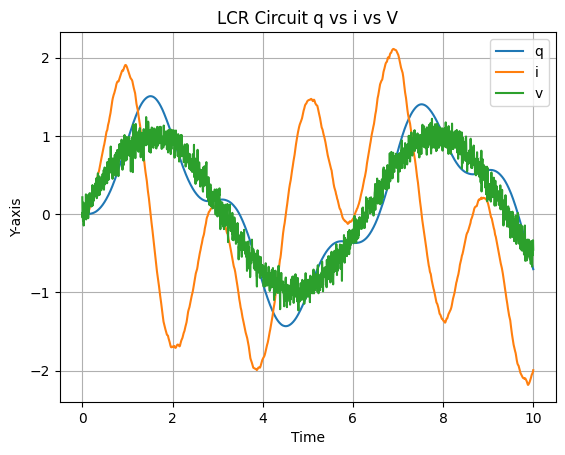

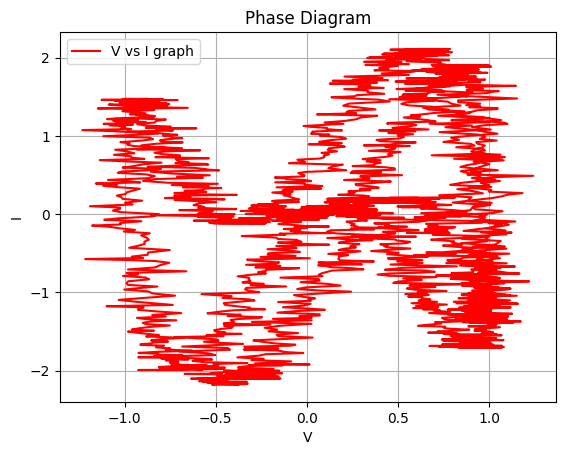

In [ ]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

t_span = (0, 10) #timespan of t = 10
y0 = [0.0, 0.0] #initial values of charge and current
t_eval = np.linspace(*t_span, 2000) #time_values
V_values = np.sin(t_eval) + np.random.normal(0, 0.1, size = t_eval.shape) #electrical noise

V_interpolate = interp1d(t_eval, V_values, fill_value = "extrapolate") #interpolating voltage values based on our random voltage model
def LCR(t, y, L, C, R, V): #defining LCR circuit
    q, i = y
    dqdt = i
    didt = (V_interpolate(t) - q / C - R * i * np.random.normal(0.4, 0.1) ) / L #resistor efficiency randomized
    return [dqdt, didt]



solution = spi.solve_ivp(LCR,  t_span, y0, t_eval = t_eval, args = (0.1, 1.0, 0.001, 31)) #returns solved array of current and charge values



plt.plot(t_eval, solution.y[0], label="q")
plt.plot(t_eval, solution.y[1], label="i")
plt.plot(t_eval, V_values, label="v")
plt.plot()
plt.title("LCR Circuit q vs i vs V")
plt.xlabel("Time")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

x = V_values
y = solution.y[1]
plt.figure()
plt.plot(x, y, label="V vs I graph", color='red')

plt.title("Phase Diagram")
plt.xlabel("V")
plt.ylabel("I")
plt.grid(True)
plt.legend()
plt.show()

    




